# MNIST Predicción de dígitos con k-vecinos más cercanos

Este ejercicio cargará los datos del MNIST y los dividirá en prueba / entrenamiento y realizará la predicción con los vecinos más cercanos.

Para cada entero de prueba, devolveremos la imagen / entero más cercano.

Las imágenes enteras se representan como matrices 28x8 de números de punto flotante.

In [1]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import ops
ops.reset_default_graph()

/home/saXsa/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/saXsa/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/saXsa/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/saXsa/anaconda3/envs/keras/lib/python3.7/site-

### Crear el grafo

In [2]:
sess = tf.Session()

### Cargar los datos

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f1cb22685d0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f1cb2268750>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f1cb2268550>)

### Generar una muestra aleatoria

In [5]:
np.random.seed(13)  # semillas de manera aleatoria
train_size = 1000
test_size = 102
rand_train_indices = np.random.choice(len(mnist.train.images), train_size, replace=False)
rand_test_indices = np.random.choice(len(mnist.test.images), test_size, replace=False)


In [6]:
rand_train_indices.shape

(1000,)

In [7]:
rand_test_indices.shape

(102,)

In [8]:
### Imagenes con etiqueta para generar el modelo
### Datos para "entrenar"

x_vals_train = mnist.train.images[rand_train_indices]
y_vals_train = mnist.train.labels[rand_train_indices]


In [9]:
x_vals_train.shape

(1000, 784)

In [10]:
y_vals_train.shape

(1000, 10)

In [11]:
### Imagenes con etiqueta para evaluar ("probar") el modelo
### Datos para "probar"

x_vals_test = mnist.test.images[rand_test_indices]
y_vals_test = mnist.test.labels[rand_test_indices]

In [12]:
x_vals_test.shape

(102, 784)

In [13]:
y_vals_test.shape

(102, 10)

### Declarar el k-valor y el tamaño del lote

In [14]:
### Preparacion de estructuras en Maquina de Calculo Tensorial TensorFlow

# Marcadores de posición
x_data_train = tf.placeholder(shape=[None, 784], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, 784], dtype=tf.float32)
y_target_train = tf.placeholder(shape=[None, 10], dtype=tf.float32)
y_target_test = tf.placeholder(shape=[None, 10], dtype=tf.float32)

### Declarar la métrica de la distancia
#### Métrica L1: elimine el comentario de la línea y comente la métrica L2 a continuación

In [15]:
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test,1))), axis=2)

#### Métrica L2: elimine el comentario de la línea y comente la métrica L1 anterior

In [16]:
#distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(x_data_train, tf.expand_dims(x_data_test,1))), reduction_indices=1))

### Predecir: Obtener el índice de distancia mínimo (vecino más cercano)

In [17]:
k = 4
batch_size=6

In [18]:
# Obtener índice de distancia min (vecino más cercano)
top_k_xvals, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
prediction_indices = tf.gather(y_target_train, top_k_indices)

# Predecir la categoría de modo
count_of_predictions = tf.reduce_sum(prediction_indices, axis=1)
prediction = tf.argmax(count_of_predictions, axis=1)

# Calcule cuántos bucles sobre los datos de entrenamiento
num_loops = int(np.ceil(len(x_vals_test)/batch_size))

test_output = []
actual_vals = []
for i in range(num_loops):
    min_index = i*batch_size
    max_index = min((i+1)*batch_size,len(x_vals_train))
    x_batch = x_vals_test[min_index:max_index]
    y_batch = y_vals_test[min_index:max_index]
    predictions = sess.run(prediction, feed_dict={x_data_train: x_vals_train, x_data_test: x_batch,
                                         y_target_train: y_vals_train, y_target_test: y_batch})
    test_output.extend(predictions)
    actual_vals.extend(np.argmax(y_batch, axis=1))

accuracy = sum([1./test_size for i in range(test_size) if test_output[i]==actual_vals[i]])
print('Precisión (Accuracy) en Conjunto de Evaluación (test set): ' + str(accuracy))

Precisión (Accuracy) en Conjunto de Evaluación (test set): 0.8823529411764696


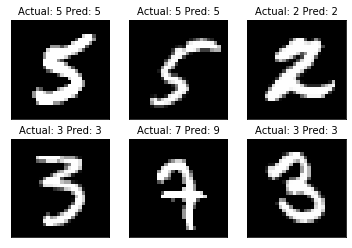

In [19]:
%matplotlib inline
# Graficar los últimos resultados del lote
actuals = np.argmax(y_batch, axis=1)

Nrows = 2
Ncols = 3
for i in range(len(actuals)):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(x_batch[i], [28,28]), cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]),
                               fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)